In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [305]:
data = pd.read_csv('Data_PredictingFlightDelays.csv',header=None)

In [306]:
# Rename col names regarding to the direction file
data.columns = ['canceled','month','departureTime','uniqueCarrier','schedElapsedTime','arrDelay','depDelay','distance']

# Data Exploration

In [6]:
data.head(3)

,canceled,month,departureTime,uniqueCarrier,schedElapsedTime,arrDelay,depDelay,distance
0,1,12,814,UA,134,0,0,679
1,1,12,830,DL,90,0,0,214
2,1,1,1835,UA,213,0,0,1605


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
canceled            6000 non-null int64
month               6000 non-null int64
departureTime       6000 non-null int64
uniqueCarrier       6000 non-null object
schedElapsedTime    6000 non-null int64
arrDelay            6000 non-null int64
depDelay            6000 non-null int64
distance            6000 non-null int64
dtypes: int64(7), object(1)
memory usage: 375.1+ KB


In [7]:
data.describe()

,canceled,month,departureTime,schedElapsedTime,arrDelay,depDelay,distance
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.166667,6.220167,1330.466500,161.693500,8.113000,9.148833,987.588833
std,0.372709,3.436325,459.118234,78.064979,35.763134,31.669299,646.666931
min,0.000000,1.000000,5.000000,40.000000,-72.000000,-16.000000,68.000000
25%,0.000000,3.000000,930.000000,105.000000,-8.000000,-3.000000,547.000000
50%,0.000000,6.000000,1325.000000,145.000000,0.000000,0.000000,837.000000
75%,0.000000,9.000000,1715.000000,200.000000,10.000000,6.000000,1249.000000
max,1.000000,12.000000,2359.000000,604.000000,410.000000,387.000000,4502.000000


In [10]:
# Check the unique values in the only categorical variable
data.uniqueCarrier.unique()

array(['UA', 'DL', 'AA'], dtype=object)

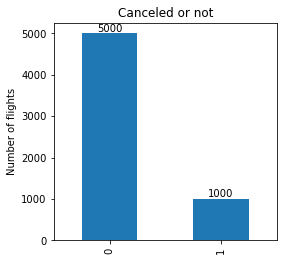

In [94]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (4,4)
data.canceled.value_counts().plot(kind='bar')
plt.title('Canceled or not') 
plt.ylabel('Number of flights')
for rect, label in zip(ax.patches, list(data.canceled.value_counts().values)):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.05, label, ha='center', va='bottom')
plt.show()

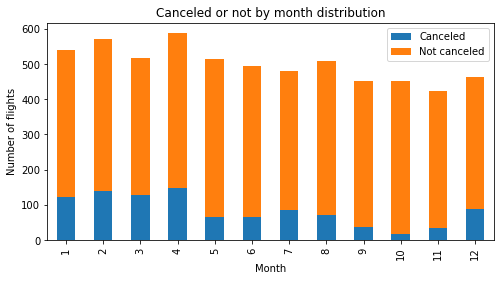

In [313]:
plt.rcParams["figure.figsize"] = (8,4)
month_0 = data.month[data.canceled == 0].value_counts()
month_1 = data.month[data.canceled == 1].value_counts()
month_df = pd.DataFrame({'Canceled':month_1, 'Not canceled':month_0})
month_df.plot(kind='bar', stacked=True)
plt.title('Canceled or not by month distribution')
plt.xlabel('Month') 
plt.ylabel('Number of flights') 
plt.show()

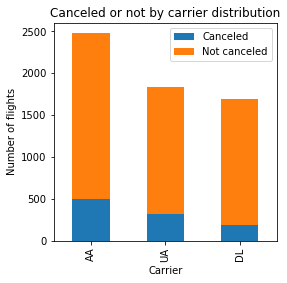

In [26]:
plt.rcParams["figure.figsize"] = (4,4)
carrier_0 = data.uniqueCarrier[data.canceled == 0].value_counts()
carrier_1 = data.uniqueCarrier[data.canceled == 1].value_counts()
carrier_df = pd.DataFrame({'Canceled':carrier_1, 'Not canceled':carrier_0})
carrier_df.plot(kind='bar', stacked=True)
plt.title('Canceled or not by carrier distribution')
plt.xlabel('Carrier') 
plt.ylabel('Number of flights') 
plt.show()

In [323]:
ua_1 = data.month[(data.canceled == 1)&(data.uniqueCarrier == 'UA')].value_counts().sort_index()
dl_1 = data.month[(data.canceled == 1)&(data.uniqueCarrier == 'DL')].value_counts().sort_index()
aa_1 = data.month[(data.canceled == 1)&(data.uniqueCarrier == 'AA')].value_counts().sort_index()
month_1_df = pd.DataFrame({'UA':ua_1, 'DL':dl_1, 'AA':aa_1})

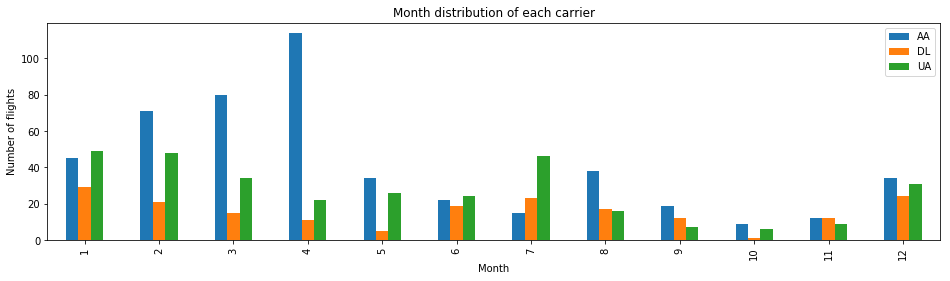

In [324]:
plt.rcParams["figure.figsize"] = (16,4)
month_1_df.plot(kind='bar', stacked=False)
plt.title('Month distribution of each carrier')
plt.xlabel('Month') 
plt.ylabel('Number of flights') 
plt.show()

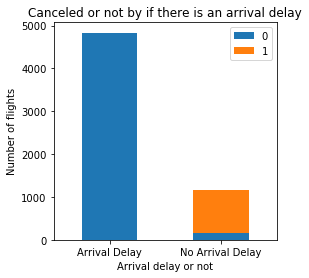

In [40]:
plt.rcParams["figure.figsize"] = (4,4)
cancel_noArrDelay = data.canceled[data.arrDelay == 0].value_counts()
cancel_arrDelay = data.canceled[data.arrDelay != 0].value_counts()
df=pd.DataFrame({'Arrival Delay':cancel_arrDelay, 'No Arrival Delay':cancel_noArrDelay}).transpose()
df.plot(kind='bar', stacked=True)
plt.title('Canceled or not by if there is an arrival delay')
plt.xlabel('Arrival delay or not') 
plt.ylabel('Number of flights')
plt.xticks(rotation=0)
plt.show()

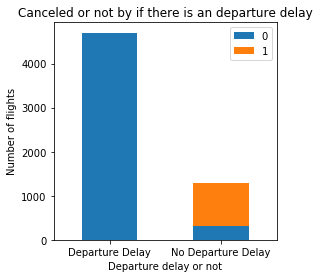

In [41]:
cancel_noDepDelay = data.canceled[data.depDelay == 0].value_counts()
cancel_depDelay = data.canceled[data.depDelay != 0].value_counts()
df=pd.DataFrame({'Departure Delay':cancel_depDelay, 'No Departure Delay':cancel_noDepDelay}).transpose()
df.plot(kind='bar', stacked=True)
plt.title('Canceled or not by if there is an departure delay')
plt.xlabel('Departure delay or not') 
plt.ylabel('Number of flights')
plt.xticks(rotation=0)
plt.show()

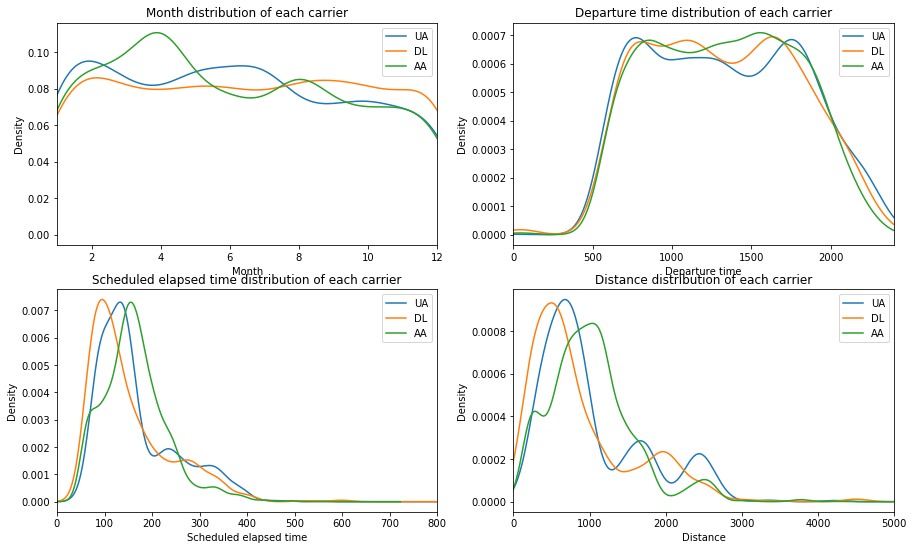

In [311]:
plt.rcParams["figure.figsize"] = (15,9)

plt.subplot2grid((2,2),(0,0))
data.month[data.uniqueCarrier == 'UA'].plot(kind='kde')
data.month[data.uniqueCarrier == 'DL'].plot(kind='kde')
data.month[data.uniqueCarrier == 'AA'].plot(kind='kde')   
plt.xlabel('Month')
plt.xlim((1,12))
plt.ylabel('Density') 
plt.title('Month distribution of each carrier')
plt.legend(('UA','DL','AA'),loc='best')

plt.subplot2grid((2,2),(0,1))
data.departureTime[data.uniqueCarrier == 'UA'].plot(kind='kde')
data.departureTime[data.uniqueCarrier == 'DL'].plot(kind='kde')
data.departureTime[data.uniqueCarrier == 'AA'].plot(kind='kde')   
plt.xlabel('Departure time')
plt.xlim((0,2400))
plt.ylabel('Density') 
plt.title('Departure time distribution of each carrier')
plt.legend(('UA','DL','AA'),loc='best') 

plt.subplot2grid((2,2),(1,0))
data.schedElapsedTime[data.uniqueCarrier == 'UA'].plot(kind='kde')
data.schedElapsedTime[data.uniqueCarrier == 'DL'].plot(kind='kde')
data.schedElapsedTime[data.uniqueCarrier == 'AA'].plot(kind='kde')   
plt.xlabel('Scheduled elapsed time')
plt.xlim((0,800))
plt.ylabel('Density') 
plt.title('Scheduled elapsed time distribution of each carrier')
plt.legend(('UA','DL','AA'),loc='best') 

plt.subplot2grid((2,2),(1,1))
data.distance[data.uniqueCarrier == 'UA'].plot(kind='kde')
data.distance[data.uniqueCarrier == 'DL'].plot(kind='kde')
data.distance[data.uniqueCarrier == 'AA'].plot(kind='kde')   
plt.xlabel('Distance')
plt.xlim((0,5000))
plt.ylabel('Density') 
plt.title('Distance distribution of each carrier')
plt.legend(('UA','DL','AA'),loc='best') 

plt.show()

# Feature Engineering

In [89]:
data.loc[data.arrDelay == 0, 'arrDelay'] = 'n'
data.loc[data.arrDelay != 'n', 'arrDelay'] = 'y'
data.loc[data.depDelay == 0, 'depDelay'] = 'n'
data.loc[data.depDelay != 'n', 'depDelay'] = 'y'

In [4]:
# Convert the categorical variables into dummy variables
data = pd.get_dummies(data,columns=['uniqueCarrier'],drop_first=False)
data = pd.get_dummies(data,columns=['arrDelay'],drop_first=False)
data = pd.get_dummies(data,columns=['depDelay'],drop_first=False)

In [5]:
df = data

In [6]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
df['departureTime_scaled'] = scaler.fit_transform(df.departureTime, scaler.fit(df.departureTime))
df['schedElapsedTime_scaled'] = scaler.fit_transform(df.schedElapsedTime, scaler.fit(df.schedElapsedTime))
df['distance_scaled'] = scaler.fit_transform(df.distance, scaler.fit(df.distance))
# df['distance_scaled'] = scaler.fit_transform(df.distance, scaler.fit(df.distance))

/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it c

In [101]:
df1 = df.filter(regex='canceled|month$|uniqueCarrier_.*|arrDelay_.*|depDelay_.*|departureTime_.*|schedElapsedTime_.*|distance_.*')

# Modeling

In [104]:
df1_np = df1.as_matrix()
y = df1_np[:,0]
X = df1_np[:,1:]

In [36]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

### Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],"penalty": ['l1', 'l2']}
log_grid_search = GridSearchCV(LogisticRegression(), log_param_grid, cv=10)
log_grid_search.fit(X_train, y_train)
log_grid_search.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [108]:
log_grid_search.score(X,y)

0.99633333333333329

In [137]:
coef = log_grid_search.best_estimator_.coef_
pd.DataFrame({"columns":list(df1.columns)[1:], "coef":list(coef.T)})

,coef,columns
0,[-0.0138794417745],month
1,[0.0],uniqueCarrier_AA
2,[0.0],uniqueCarrier_DL
3,[0.0],uniqueCarrier_UA
4,[1.03876108089],arrDelay_n
5,[-2.49612385592],arrDelay_y
6,[0.748110840887],depDelay_n
7,[-1.74213186691],depDelay_y
8,[0.0],departureTime_scaled
9,[0.0],schedElapsedTime_scaled


#### Because of the existance of arrDelay and depDelay, the rest variables have almost no use. Also based on the understanding of all the variables, arrDelay and depDelay should be removed.

#### Below is the new dataset.

In [37]:
df2 = df.filter(regex='canceled|month$|uniqueCarrier_.*|departureTime_.*|schedElapsedTime_.*|distance_.*')
df2_np = df2.as_matrix()
y = df2_np[:,0]
X = df2_np[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [145]:
df2.head(3)

,canceled,month,uniqueCarrier_AA,uniqueCarrier_DL,uniqueCarrier_UA,departureTime_scaled,schedElapsedTime_scaled,distance_scaled
0,1,12,0,0,1,-1.125003,-0.354779,-0.477239
1,1,12,0,1,0,-1.090151,-0.918459,-1.196371
2,1,1,0,0,1,1.099010,0.657283,0.954839


In [409]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],"penalty": ['l1', 'l2']}
log_grid_search = GridSearchCV(LogisticRegression(), log_param_grid, cv=10)
log_grid_search.fit(X_train, y_train)
log_grid_search.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [84]:
log_grid_search.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [410]:
log_grid_search.score(X_train, y_train)

0.61570155902004453

In [79]:
log_grid_search.score(X_test, y_test)

0.84166666666666667

In [83]:
log_grid_search.predict(X_test)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

#### It is mainly because of the imbalanced classes in our dataset as we have many more non-canceled flights.

#### One way is to increase the number of canceled examples - Up-sample Minority Class.

In [195]:
train, test = train_test_split(df2, test_size=0.1)

In [196]:
# Separate majority and minority classes
train_majority = train[train.canceled==0]
train_minority = train[train.canceled==1]
print 'majority: ' + str(len(train_majority)) + '  minority: ' + str(len(train_minority))

majority: 4490  minority: 910


In [197]:
from sklearn.utils import resample
# Upsample minority class
train_minority_upsampled = resample(train_minority, 
                                 replace=True,                     # sample with replacement
                                 n_samples=len(train_majority),    # to match majority class
                                 random_state=123)                 # reproducible results
 
# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_majority, train_minority_upsampled])
 
# Display new class counts
train_upsampled.canceled.value_counts()

1    4490
0    4490
Name: canceled, dtype: int64

In [198]:
from sklearn.utils import shuffle
train_upsampled = shuffle(train_upsampled)

In [199]:
X_train = train_upsampled.as_matrix()[:,1:]
y_train = train_upsampled.as_matrix()[:,0]
X_test = test.as_matrix()[:,1:]
y_test = test.as_matrix()[:,0]

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],"penalty": ['l1', 'l2']}
log_grid_search = GridSearchCV(LogisticRegression(), log_param_grid, cv=10)
log_grid_search.fit(X_train, y_train)
log_grid_search.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [201]:
log_grid_search.score(X_test, y_test)

0.60166666666666668

In [202]:
log_grid_search.score(X_train, y_train)

0.61570155902004453

In [239]:
from sklearn.learning_curve import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
        log_grid_search.best_estimator_, X_train, y_train, cv=None, n_jobs=1, train_sizes=np.linspace(0.01,1, 20), verbose=0)

In [240]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

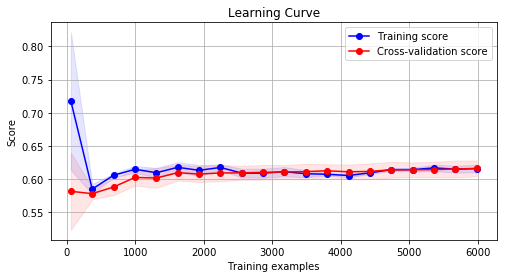

In [241]:
plt.rcParams["figure.figsize"] = (8,4)
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Cross-validation score')

# plt.ylim((1,0.8))
plt.legend(loc="best")

# plt.draw()
# plt.gca().invert_yaxis()
plt.show()

In [242]:
coef = log_grid_search.best_estimator_.coef_
pd.DataFrame({"columns":list(df2.columns)[1:], "coef":list(coef.T)})

,coef,columns
0,[-0.0933092665369],month
1,[0.387259427639],uniqueCarrier_AA
2,[-0.295215045913],uniqueCarrier_DL
3,[0.229579802375],uniqueCarrier_UA
4,[0.0243721971754],departureTime_scaled
5,[0.172569545476],schedElapsedTime_scaled
6,[-0.473643526241],distance_scaled


#### For a general-purpose metric for classification, I want to see Area Under ROC Curve (AUROC).

In [245]:
# AUROC
prob_y_1 = log_grid_search.best_estimator_.predict_proba(X_train)
prob_y_1 = [p[1] for p in prob_y_1]
roc_auc_score(y_train, prob_y_1)

0.64762806236080173

In [366]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import roc_curve, auc  

cv = StratifiedKFold(y_train, n_folds=10)  
classifier = log_grid_search.best_estimator_

mean_tpr = 0.0  
mean_fpr = np.linspace(0, 1, 100)  
all_tpr = []  

plt.rcParams["figure.figsize"] = (6,6)
for i, (train_set, test_set) in enumerate(cv):   
    probas_ = classifier.fit(X_train[train_set], y_train[train_set]).predict_proba(X_train[test_set])  

    fpr, tpr, thresholds = roc_curve(y_train[test_set], probas_[:, 1])  
    mean_tpr += interp(mean_fpr, fpr, tpr)          #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数  
    mean_tpr[0] = 0.0                               #初始处为0  
    roc_auc = auc(fpr, tpr)  
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来  
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.3f)' % (i, roc_auc))  

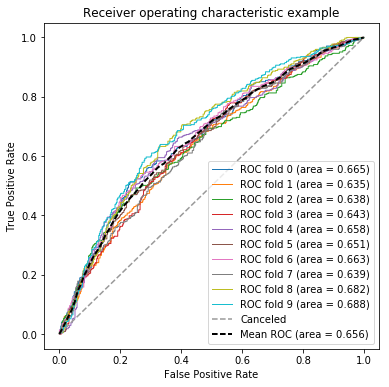

In [367]:
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Canceled')  
  
mean_tpr /= len(cv)                     #在mean_fpr100个点，每个点处插值插值多次取平均  
mean_tpr[-1] = 1.0                      #坐标最后一个点为（1,1）  
mean_auc = auc(mean_fpr, mean_tpr)      #计算平均AUC值  
#画平均ROC曲线  
#print mean_fpr,len(mean_fpr)  
#print mean_tpr  
plt.plot(mean_fpr, mean_tpr, 'k--',  
         label='Mean ROC (area = %0.3f)' % mean_auc, lw=2)  
  
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()  

A second way is - Penalize Algorithms (Cost-Sensitive Training).

In [205]:
X_train2 = train.as_matrix()[:,1:]
y_train2 = train.as_matrix()[:,0]

In [206]:
log_grid_search2 = GridSearchCV(LogisticRegression(class_weight='balanced'), log_param_grid, cv=10) # penalize
log_grid_search2.fit(X_train2, y_train2)
log_grid_search2.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [210]:
log_grid_search2.score(X_train2, y_train2)

0.64222222222222225

In [208]:
# Accuracy
log_grid_search2.score(X_test, y_test)

0.63666666666666671

In [251]:
# AUROC
prob_y_2 = log_grid_search2.best_estimator_.predict_proba(X_train2)
prob_y_2 = [p[1] for p in prob_y_2]
roc_auc_score(y_train2, prob_y_2)

0.63948689395237279

#### A third way is an over-sampling one - Synthetic Minority Oversampling Technique (SMOTE)

In [292]:
x_1 = train[train.canceled == 1].as_matrix()
x_0 = train[train.canceled == 0].as_matrix()
print 'number of canceled flights in training set: ' + str(len(x_1))
print 'number of new flights to be created for training set: ' + str(len(x_0) - len(x_1))
s=Smote(x_1,N=400)

number of canceled flights in training set: 910
number of new flights to be created for training set: 3580


In [293]:
res = s.over_sampling()

neighbors NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)


In [294]:
len(res)

3640

In [335]:
new_train = np.concatenate((x_1, x_0, res), axis=0)
new_train = shuffle(new_train)

In [337]:
X_train3 = new_train[:,1:]
y_train3 = new_train[:,0]

In [340]:
log_grid_search3 = GridSearchCV(LogisticRegression(class_weight='balanced'), log_param_grid, cv=10) # penalize
log_grid_search3.fit(X_train3, y_train3)
print log_grid_search3.best_params_
print 'training set score: '+str(log_grid_search3.score(X_train3, y_train3))
print 'training set score: '+str(log_grid_search3.score(X_test, y_test))
print 'auroc: '+str(roc_auc_score(y_train3, [p[1] for p in log_grid_search3.best_estimator_.predict_proba(X_train3)]))

{'penalty': 'l2', 'C': 0.01}
training set score: 0.61592920354
training set score: 0.601666666667
auroc: 0.655450476027


### SVM

In [350]:
from sklearn.svm import SVC
def svc_param_selection(X, y, kernel, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    svc_param_grid = {'C': Cs, 'gamma' : gammas}
    svc_grid_search = GridSearchCV(SVC(kernel=kernel), svc_param_grid, cv=nfolds)
    svc_grid_search.fit(X, y)
    return svc_grid_search

In [352]:
svc1 = svc_param_selection(X_train3, y_train3,'rbf',10)

In [353]:
svc1.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [354]:
svc1.score(X_test,y_test)

0.64666666666666661

In [368]:
cv = StratifiedKFold(y_train3, n_folds=10) 
# classifier = svm.SVC(kernel='linear', probability=True,  
#                      random_state=random_state)#注意这里，probability=True,需要，不然预测的时候会出现异常。另外rbf核效果更好些。  

classifier = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

mean_tpr = 0.0  
mean_fpr = np.linspace(0, 1, 100)  
all_tpr = []  

plt.rcParams["figure.figsize"] = (6,6)
for i, (train_set, test_set) in enumerate(cv):  
    #通过训练数据，使用svm线性核建立模型，并对测试集进行测试，求出预测得分  
    probas_ = classifier.fit(X_train3[train_set], y_train3[train_set]).predict_proba(X_train3[test_set])  
#    print set(y[train])                     #set([0,1]) 即label有两个类别  
#    print len(X[train]),len(X[test])        #训练集有84个，测试集有16个  
#    print "++",probas_                      #predict_proba()函数输出的是测试集在lael各类别上的置信度，  
#    #在哪个类别上的置信度高，则分为哪类  
    # Compute ROC curve and area the curve  
    #通过roc_curve()函数，求出fpr和tpr，以及阈值  
    fpr, tpr, thresholds = roc_curve(y_train3[test_set], probas_[:, 1])  
    mean_tpr += interp(mean_fpr, fpr, tpr)          #对mean_tpr在mean_fpr处进行插值，通过scipy包调用interp()函数  
    mean_tpr[0] = 0.0                               #初始处为0  
    roc_auc = auc(fpr, tpr)  
    #画图，只需要plt.plot(fpr,tpr),变量roc_auc只是记录auc的值，通过auc()函数能计算出来  
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.3f)' % (i, roc_auc))  

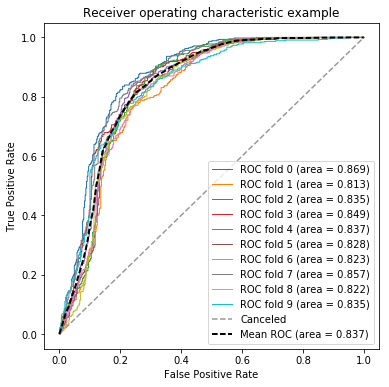

In [369]:
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Canceled')  
  
mean_tpr /= len(cv)                     #在mean_fpr100个点，每个点处插值插值多次取平均  
mean_tpr[-1] = 1.0                      #坐标最后一个点为（1,1）  
mean_auc = auc(mean_fpr, mean_tpr)      #计算平均AUC值  
#画平均ROC曲线  
#print mean_fpr,len(mean_fpr)  
#print mean_tpr  
plt.plot(mean_fpr, mean_tpr, 'k--',  
         label='Mean ROC (area = %0.3f)' % mean_auc, lw=2)  
  
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Receiver operating characteristic example')  
plt.legend(loc="lower right")  
plt.show()  

### Random Forest

In [376]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
# rf_param_grid = {"max_depth": [2, 3, None],
#           "max_features": [2, 3, 5],
#           "min_samples_split": [2, 3, 10],
#           "min_samples_leaf": [1, 3, 10],
#           "bootstrap": [True, False],
#           "criterion": ["gini", "entropy"]}
# rf_grid_search = GridSearchCV(RandomForestClassifier(n_estimators=20), param_grid, cv=10)
# rf_grid_search.fit(X, y)
# rf_grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [377]:
rf = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=3)

In [414]:
X_train0 = train.as_matrix()[:,1:]
y_train0 = train.as_matrix()[:,0]

In [415]:
rf.fit(X_train0,y_train0)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [416]:
# Predict on training set
pred_y_4 = rf.predict(X_train)
 
# Is our model still predicting just one class?
print np.unique( pred_y_4 ) 
# [0 1]

[ 0.]


In [417]:
from sklearn.metrics import accuracy_score
# How's our train accuracy?
print accuracy_score(y_train, pred_y_4) 

# How's our test accuracy?
print rf.score(X_test, y_test) 
 
# What about AUROC?
prob_y_4 = rf.predict_proba(X_train)
prob_y_4 = [p[1] for p in prob_y_4]
print roc_auc_score(y_train, prob_y_4) 

0.5
0.85
0.685608107103


In [387]:
rf.fit(X_train3,y_train3)
# train
print rf.score(X_train3, y_train3) 

# test
print rf.score(X_test, y_test) 
 
# AUROC?
prob_y_5 = rf.predict_proba(X_train3)
prob_y_5 = [p[1] for p in prob_y_5]
print roc_auc_score(y_train3, prob_y_5) 

0.637168141593
0.61
0.688800998556


In [395]:
rf2 = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=3,n_estimators=1000)
rf2.fit(X_train3,y_train3)
# train
print rf2.score(X_train3, y_train3) 
# test
print rf2.score(X_test, y_test)  
# AUROC?
print roc_auc_score(y_train3, [p[1] for p in rf2.predict_proba(X_train3)]) 

0.651327433628
0.673333333333
0.711213857412


In [396]:
rf3 = RandomForestClassifier(bootstrap=True,criterion='entropy',max_depth=5,n_estimators=1000)
rf3.fit(X_train3,y_train3)
# train
print rf3.score(X_train3, y_train3) 
# test
print rf3.score(X_test, y_test)  
# AUROC?
print roc_auc_score(y_train3, [p[1] for p in rf3.predict_proba(X_train3)]) 

0.693584070796
0.655
0.76324391199


In [397]:
fi2 = rf3.feature_importances_
pd.DataFrame({"columns":list(df2.columns)[1:], "importance":list(fi2.T)}).sort('importance',ascending=0)

/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,columns,importance
0,month,0.339972
6,distance_scaled,0.199827
5,schedElapsedTime_scaled,0.166277
2,uniqueCarrier_DL,0.119587
4,departureTime_scaled,0.085030
1,uniqueCarrier_AA,0.055896
3,uniqueCarrier_UA,0.033411


### Gradient Boosting Decison Tree

In [398]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbdt=GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1
# , min_samples_split=2, min_samples_leaf=1, max_depth=3, init=None, random_state=None, max_features=None
# , alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False)

In [405]:
# gbdt.fit(X_train3,y_train3)
# pred=gbdt.predict(X_test)
# pred[:20]

array([ 0.59270299,  0.49117804,  0.70379298,  0.52996289,  0.38549171,
        0.15094973,  0.06511925,  0.58021915,  0.60425107,  0.56241255,
        0.42834414,  0.45286677,  0.31469259,  0.46312274,  0.29930867,
        0.40257767,  0.52905523,  0.68795223,  0.45633107,  0.22217588])

In [407]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=1000,max_depth=5)
gbc.fit(X_train3,y_train3)
print "Train Set Accuracy : %.4g" % accuracy_score(y_train3, gbc.predict(X_train3))
print "Train Set Accuracy : %.4g" % accuracy_score(y_test, gbc.predict(X_test))
print "AUC Score (Train): %f" % roc_auc_score(y_train3, [p[1] for p in gbc.predict_proba(X_train3)]) 

Train Set Accuracy : 0.9851
Train Set Accuracy : 0.7667
AUC Score (Train): 0.998762


In [420]:
gbc2 = GradientBoostingClassifier(n_estimators=1000,max_depth=7)
gbc2.fit(X_train3,y_train3)
print "Train Set Accuracy : %.4g" % accuracy_score(y_train3, gbc2.predict(X_train3))
print "Train Set Accuracy : %.4g" % accuracy_score(y_test, gbc2.predict(X_test))
print "AUC Score (Train): %f" % roc_auc_score(y_train3, [p[1] for p in gbc2.predict_proba(X_train3)]) 

Train Set Accuracy : 0.9923
Train Set Accuracy : 0.7833
AUC Score (Train): 0.999812


In [496]:
df2.columns[1:-1]

Index([u'canceled', u'month', u'uniqueCarrier_AA', u'uniqueCarrier_DL',
       u'uniqueCarrier_UA', u'departureTime_scaled',
       u'schedElapsedTime_scaled', u'distance_scaled'],
      dtype='object')

In [500]:
fi3 = gbc2.feature_importances_
pd.DataFrame({"columns":list(df2.columns[:-1])[1:], "importance":list(fi3.T)}).sort('importance',ascending=0)

/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,columns,importance
4,departureTime_scaled,0.319557
6,distance_scaled,0.245279
5,schedElapsedTime_scaled,0.228425
0,month,0.163442
3,uniqueCarrier_UA,0.015699
1,uniqueCarrier_AA,0.014362
2,uniqueCarrier_DL,0.013237


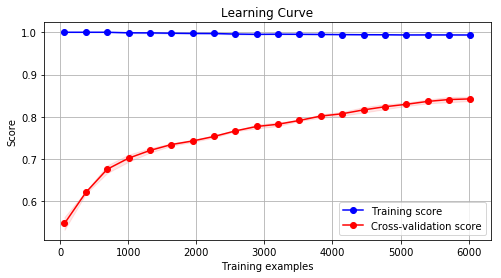

In [421]:
train_sizes, train_scores, test_scores = learning_curve(
        gbc2, X_train3, y_train3, cv=None, n_jobs=1, train_sizes=np.linspace(0.01,1, 20), verbose=0)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.rcParams["figure.figsize"] = (8,4)
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Cross-validation score')

# plt.ylim((1,0.8))
plt.legend(loc="best")

# plt.draw()
# plt.gca().invert_yaxis()
plt.show()

In [536]:
confusion_matrix(y_test, gbc2.predict(X_test))

array([[447,  63],
       [ 67,  23]])

In [549]:
from sklearn.metrics import f1_score
f1_score(y_test, gbc2.predict(X_test), average='binary')

0.2613636363636363

In [541]:
# 2 * (precision * recall) / (precision + recall)
p = 447/float(447+67)
r = 447/float(447+23)
2*(p*r)/(p+r)

0.9085365853658537

In [555]:
2*447/float(2*447+67+23)

0.9085365853658537

In [429]:
gbc2.predict(X_test)

array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

# Model Optimization 

#### Observe the data again - bad cases in test set

In [392]:
test.canceled.value_counts()

0    510
1     90
Name: canceled, dtype: int64

In [431]:
test['canceled_pred'] = pd.Series(gbc2.predict(X_test), index=test.index)

/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [447]:
test.canceled_pred = test.canceled_pred.astype(int)
test[['canceled','canceled_pred']].head()

,canceled,canceled_pred
3726,0,1
2786,0,0
2182,0,1
2891,0,0
3478,0,0


In [438]:
float(test.loc[2891,'canceled']) == test.loc[2891,'canceled_pred']

True

In [444]:
bad_cases = test[test.canceled != test.canceled_pred]
len(bad_cases)

130

In [446]:
bad_cases

,canceled,month,uniqueCarrier_AA,uniqueCarrier_DL,uniqueCarrier_UA,departureTime_scaled,schedElapsedTime_scaled,distance_scaled,canceled_pred
3726,0,1,0,0,1,1.022771,-0.290724,-0.186493,1
2182,0,2,0,0,1,-0.502018,-0.431644,-0.393727,1
4044,0,9,1,0,0,0.009875,0.106414,0.178486,1
2513,0,2,1,0,0,-0.937672,2.796705,2.300311,1
5980,0,7,0,0,1,1.066336,-0.444455,-0.590135,1
2878,0,12,0,0,1,-0.595684,-0.252292,-0.393727,1
3407,0,6,0,0,1,0.815835,-0.239481,-0.393727,1
507,1,1,1,0,0,0.467312,1.387505,0.888338,0
189,1,12,1,0,0,0.184137,1.195341,0.620790,0
1880,0,8,0,1,0,0.271268,0.234523,0.136730,1


#### data discretization

In [ ]:
# s=pd.cut(x,bins=[0,10,20,30])  
# d=pd.get_dummies(s)  

In [457]:
train['carrierMonth'] = train.month.map(str) + train.uniqueCarrier_AA.map(str) \
    + train.uniqueCarrier_DL.map(str) + train.uniqueCarrier_UA.map(str)
test['carrierMonth'] = test.month.map(str) + test.uniqueCarrier_AA.map(str) \
    + test.uniqueCarrier_DL.map(str) + test.uniqueCarrier_UA.map(str)

/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [458]:
train = pd.get_dummies(train,columns=['carrierMonth'],drop_first=False)
test = pd.get_dummies(test,columns=['carrierMonth'],drop_first=False)

In [484]:
train.columns

Index([u'canceled', u'departureTime_scaled', u'schedElapsedTime_scaled',
       u'distance_scaled', u'carrierMonth_10001', u'carrierMonth_1001',
       u'carrierMonth_10010', u'carrierMonth_1010', u'carrierMonth_10100',
       u'carrierMonth_1100', u'carrierMonth_11001', u'carrierMonth_11010',
       u'carrierMonth_11100', u'carrierMonth_12001', u'carrierMonth_12010',
       u'carrierMonth_12100', u'carrierMonth_2001', u'carrierMonth_2010',
       u'carrierMonth_2100', u'carrierMonth_3001', u'carrierMonth_3010',
       u'carrierMonth_3100', u'carrierMonth_4001', u'carrierMonth_4010',
       u'carrierMonth_4100', u'carrierMonth_5001', u'carrierMonth_5010',
       u'carrierMonth_5100', u'carrierMonth_6001', u'carrierMonth_6010',
       u'carrierMonth_6100', u'carrierMonth_7001', u'carrierMonth_7010',
       u'carrierMonth_7100', u'carrierMonth_8001', u'carrierMonth_8010',
       u'carrierMonth_8100', u'carrierMonth_9001', u'carrierMonth_9010',
       u'carrierMonth_9100'],
      dtype='o

In [478]:
# train = train.iloc[:, :40] # don't dummy twice, or these cols will be appended twice

In [462]:
train1 = train.drop(['month','uniqueCarrier_AA', 'uniqueCarrier_DL','uniqueCarrier_UA'], axis=1)
test1 = test.drop(['month','uniqueCarrier_AA', 'uniqueCarrier_DL','uniqueCarrier_UA','canceled_pred'], axis=1)
# test = test.filter(regex='canceled|departureTime_scaled|schedElapsedTime_scaled|distance_scaled|carrierMonth_.*')

In [485]:
train1 = shuffle(train1)

In [486]:
X_train4 = train1.as_matrix()[:,1:]
y_train4 = train1.as_matrix()[:,0]
X_test1 = test1.as_matrix()[:,1:]
y_test1 = test1.as_matrix()[:,0]

In [490]:
len(train.columns)**(1/2.)

6.324555320336759

In [492]:
gbc3 = GradientBoostingClassifier(n_estimators=1000,max_depth=7,max_features=6)
gbc3.fit(X_train4,y_train4)
print "Train Set Accuracy : %.4g" % accuracy_score(y_train4, gbc3.predict(X_train4))
print "Train Set Accuracy : %.4g" % accuracy_score(y_test1, gbc3.predict(X_test1))
print "AUC Score (Train): %f" % roc_auc_score(y_train4, [p[1] for p in gbc3.predict_proba(X_train4)]) 

Train Set Accuracy : 0.987
Train Set Accuracy : 0.8
AUC Score (Train): 0.999398


In [493]:
fi4 = gbc3.feature_importances_
pd.DataFrame({"columns":list(train.columns)[1:], "importance":list(fi4.T)}).sort('importance',ascending=0)

/Users/feiyiwang/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,columns,importance
0,departureTime_scaled,0.354018
2,distance_scaled,0.290513
1,schedElapsedTime_scaled,0.274880
30,carrierMonth_7001,0.005093
35,carrierMonth_8100,0.004765
23,carrierMonth_4100,0.004245
8,carrierMonth_1100,0.004065
14,carrierMonth_12100,0.003699
18,carrierMonth_3001,0.003507
20,carrierMonth_3100,0.003081


#### Precision-Recall曲线

In [520]:
from sklearn.metrics import confusion_matrix

In [521]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[463  47]
 [ 73  17]]


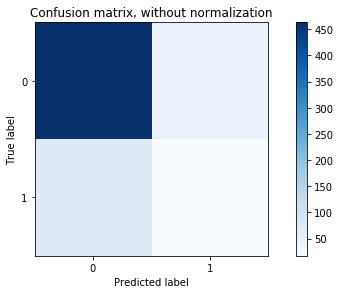

In [522]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, gbc3.predict(X_test1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

In [530]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test1, gbc3.predict(X_test1))

In [533]:
from sklearn.metrics import precision_recall_curve

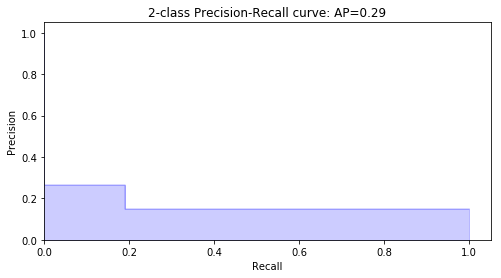

In [535]:
precision, recall, _ = precision_recall_curve(y_test1, gbc3.predict(X_test1))

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

In [212]:
import random
from sklearn.neighbors import NearestNeighbors

class Smote:
    def __init__(self,samples,N=10,k=5):
        self.n_samples,self.n_attrs=samples.shape
        self.N=N
        self.k=k
        self.samples=samples
        self.newindex=0
       # self.synthetic=np.zeros((self.n_samples*N,self.n_attrs))

    def over_sampling(self):
        N=int(self.N/100)
        self.synthetic = np.zeros((self.n_samples * N, self.n_attrs))
        neighbors=NearestNeighbors(n_neighbors=self.k).fit(self.samples)
        print 'neighbors',neighbors
        for i in range(len(self.samples)):
            nnarray=neighbors.kneighbors(self.samples[i].reshape(1,-1),return_distance=False)[0]
            #print nnarray
            self._populate(N,i,nnarray)
        return self.synthetic


    # for each minority class samples,choose N of the k nearest neighbors and generate N synthetic samples.
    def _populate(self,N,i,nnarray):
        for j in range(N):
            nn=random.randint(0,self.k-1)
            dif=self.samples[nnarray[nn]]-self.samples[i]
            gap=random.random()
            self.synthetic[self.newindex]=self.samples[i]+gap*dif
            self.newindex+=1